#### bestDFに特徴量を足していく

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
from scipy.stats import norm, skew
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import matplotlib
font = {'family': 'Yu Mincho'}
matplotlib.rc('font', **font)

pd.set_option('max_columns',1000)
pd.set_option('max_rows',1000)

import warnings
warnings.filterwarnings('ignore')

import re
import geocoder
from geopy.distance import great_circle, vincenty
from tqdm import tqdm

import os
import gc
# print(os.listdir("././input"))
# print(os.listdir("././submit"))
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
SEED=1234
n_splits=10

In [2]:
tr_path='./input/best_train.csv'
te_path='./input/best_test.csv'
try_path='./input/best_train_y.csv'

X_train=pd.read_csv(tr_path,index_col=0)
X_test=pd.read_csv(te_path,index_col=0)
y_train=pd.read_csv(try_path,index_col=0,header=None)


In [3]:
TE_tr=pd.read_csv('./input/TE_train.csv',index_col=0).drop(columns='id')
TE_te=pd.read_csv('./input/TE_test.csv',index_col=0).drop(columns='id')


In [4]:
# y_train=y_train.reset_index().groupby(0)[1].mean()

In [5]:
# X_train=X_train.reset_index().merge(TE_tr.reset_index()[['index','all_TE']],how='left',on='index').set_index('index')
# X_test=X_test.reset_index().merge(TE_te.reset_index()[['index','all_TE']],how='left',on='index').set_index('index')

In [95]:
def get_center_dis(df,col,lat,lon):
    '''
    国会議事堂からの距離を求める関数
    '''
    df[col] = df.apply(lambda x: vincenty((x['loc_lat'],x['loc_lon']),(lat,lon)).meters, axis=1)
    return df
#渋谷駅
X_train = get_center_dis(X_train, 'center_dis2', 35.658034, 139.701636)
X_test = get_center_dis(X_test, 'center_dis2', 35.658034, 139.701636)
#東京駅
X_train = get_center_dis(X_train, 'center_dis3', 35.681236, 139.767125)
X_test = get_center_dis(X_test, 'center_dis3', 35.681236, 139.767125)
#青山一丁
X_train = get_center_dis(X_train, 'center_dis4', 35.672857, 139.723844)
X_test = get_center_dis(X_test, 'center_dis4', 35.672857, 139.723844)
#田園調布駅
X_train = get_center_dis(X_train, 'center_dis4', 35.596867, 139.667337)
X_test = get_center_dis(X_test, 'center_dis4', 35.596867, 139.667337)


In [6]:
train=pd.DataFrame({'id':X_train.reset_index()['index'].values})
test=pd.DataFrame({'id':X_test.reset_index()['index'].values})

In [7]:
X_train.columns

Index(['面積', '築年数', 'station_dis_min', 'center_dis', 'loc_lat', 'loc_lon',
       '総階数', '畳', '所在階', 'sta_lat', 'sta_lon', '追焚機能', '方角_南', 'BSアンテナ', 'L',
       '建物構造_RC（鉄筋コンクリート）', '戸建て', '室内洗濯機置場', 'IHコンロ', '駐輪場_無', '駐車場_空有'],
      dtype='object')

In [98]:
import lightgbm as lgb
from sklearn.model_selection import KFold, train_test_split
from time import time
import datetime
from script import RegressionPredictor
import japanize_matplotlib
y_train_log = np.log1p(y_train)

lgbm_params = {
    'num_iterations': 15000,
    'boosting_type': 'gbdt',/home/higuchi/Desktop/kaggle/mynabi2019/predict/modeling_wo_outlier.py
    'objective': 'regression',
    'metric': 'mae',
    'max_depth': -1,
    'colsample_bytree': 1.0,
    'colsample_bylevel': 0.3,
    'gamma': 0,
    'lambda': 1,
    'eta': 0.1,
    'min_child_weight': 1,
    'verbose': 1,
    'random_state': 0,
    'early_stopping_round': 50,
    'verbose_eval':500

    }

Training on fold 1
77994 8667
Training until validation scores don't improve for 50 rounds.
[500]	training's l1: 0.0463968	valid_1's l1: 0.0631521
[1000]	training's l1: 0.0346695	valid_1's l1: 0.0590385
[1500]	training's l1: 0.0271822	valid_1's l1: 0.0567904
[2000]	training's l1: 0.0220347	valid_1's l1: 0.0554577
[2500]	training's l1: 0.0182475	valid_1's l1: 0.0546363
[3000]	training's l1: 0.0153465	valid_1's l1: 0.0539202
[3500]	training's l1: 0.0131107	valid_1's l1: 0.0533079
[4000]	training's l1: 0.0113706	valid_1's l1: 0.0529215
Early stopping, best iteration is:
[3961]	training's l1: 0.0115008	valid_1's l1: 0.0529145
start predict
Fold 1 finished in 0:00:09.542026
Training on fold 2
77995 8666
Training until validation scores don't improve for 50 rounds.
[500]	training's l1: 0.046643	valid_1's l1: 0.0612962
[1000]	training's l1: 0.0345032	valid_1's l1: 0.0576614
[1500]	training's l1: 0.0270642	valid_1's l1: 0.0556324
[2000]	training's l1: 0.0218987	valid_1's l1: 0.0542468
[2500]	t

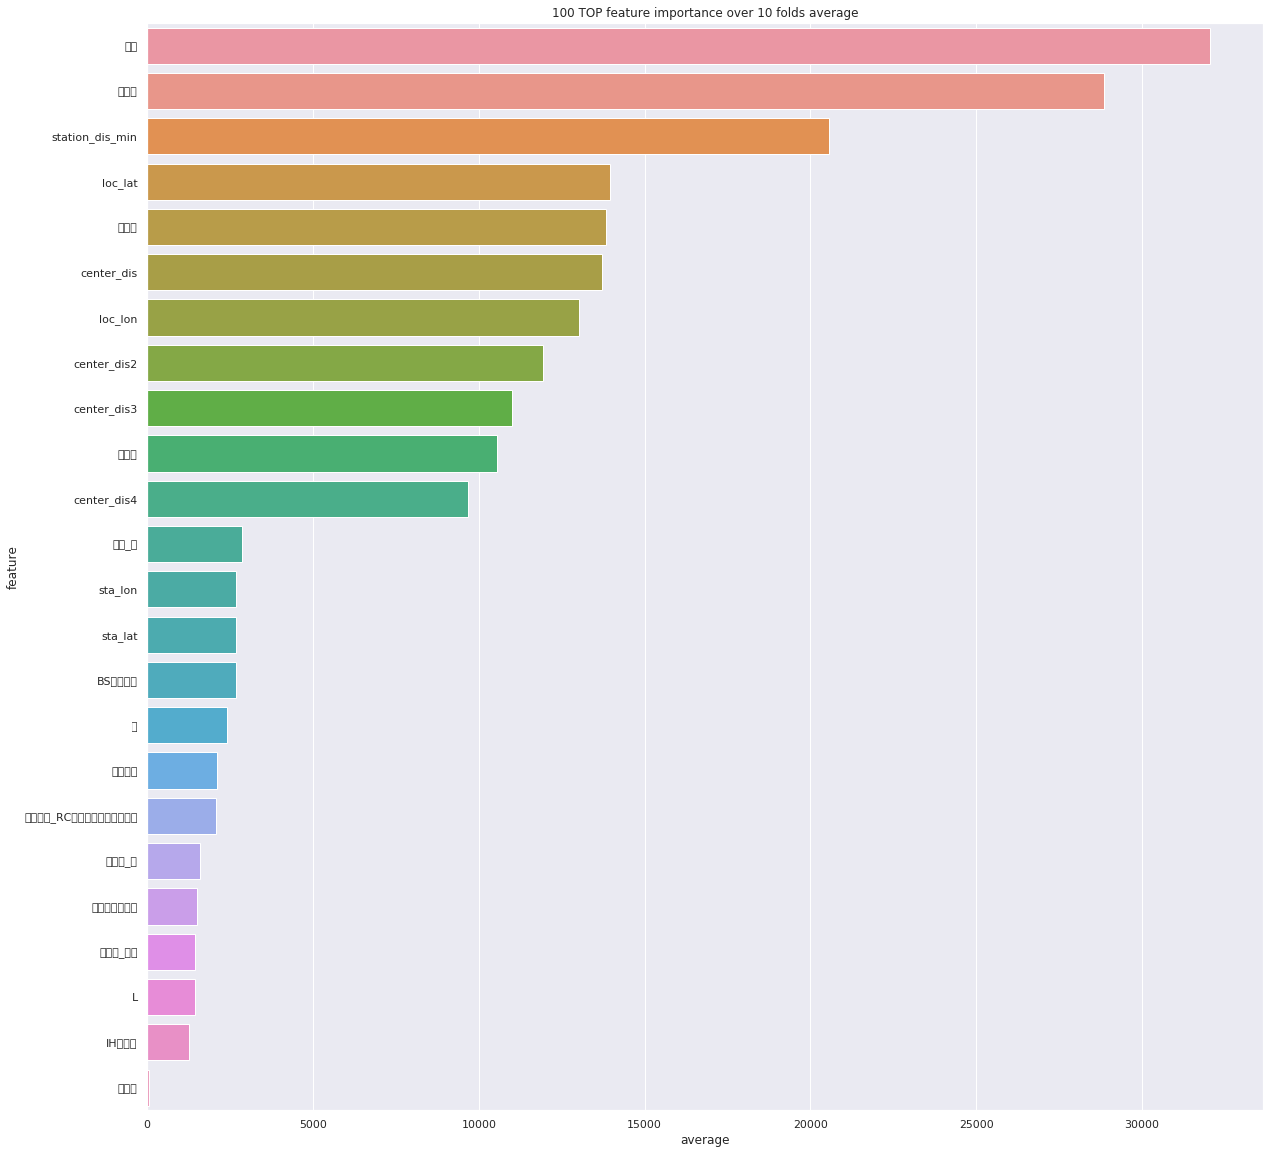

In [99]:
import lightgbm as lgb
from sklearn.model_selection import KFold, train_test_split
from time import time
import datetime

params = {
    'num_iterations': 15000,
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'mae',
    'max_depth': -1,
    'colsample_bytree': 1.0,
    'colsample_bylevel': 0.3,
    'gamma': 0,
    'lambda': 1,
    'eta': 0.1,
    'min_child_weight': 1,
    'verbose': 1,
    'random_state': 0,
    'early_stopping_round': 50

    }

kf = KFold(n_splits=n_splits, random_state=SEED)


rmses = list()
feature_importances = pd.DataFrame()
feature_importances['feature'] = X_train.columns
predictions = pd.DataFrame({'id':list(test.id.values)})
oof = pd.DataFrame({'id':list(train.id.values),'y_train':list(y_train.values)})
training_start_time = time()

for fold, (trn_idx, val_idx) in enumerate(kf.split(X_train, y_train_log)):
    start_time = time()
    print('Training on fold {}'.format(fold + 1))
    
    tr_x, tr_y = X_train.iloc[trn_idx], y_train_log.iloc[trn_idx]
    vl_x, vl_y = X_train.iloc[val_idx], y_train_log.iloc[val_idx]
    print(len(tr_x), len(vl_y))
    
    tr_data = lgb.Dataset(tr_x, label=tr_y)
    vl_data = lgb.Dataset(vl_x, label=vl_y)
    clf = lgb.train(params, tr_data, 5000, valid_sets = [tr_data, vl_data], verbose_eval=500, early_stopping_rounds=20)
    oof.loc[val_idx,'oof'] = np.expm1(clf.predict(vl_x, num_iteration=clf.best_iteration))
    
    ## アンサンブル
    print('start predict')
    pred = clf.predict(X_test)
    predictions['pred'+str(fold)] = np.expm1(pred)
 
    feature_importances['fold_{}'.format(fold + 1)] = clf.feature_importance()
    rmses.append(clf.best_score['valid_1']['l1'])
    
    del tr_x, tr_y, vl_x, vl_y, tr_data, vl_data
    gc.collect()
    
    print('Fold {} finished in {}'.format(fold + 1, str(datetime.timedelta(seconds=time() - start_time))))
print('-' * 30)
print('Training has finished.')
print('Total training time is {}'.format(str(datetime.timedelta(seconds=time() - training_start_time))))
print('Mean RMSE:', np.mean(rmses))
print('-' * 30)

feature_importances['average'] = feature_importances[['fold_{}'.format(fold + 1) for kf in range(kf.n_splits)]].mean(axis=1)

plt.figure(figsize=(20, 20))
sns.barplot(data=feature_importances.sort_values(by='average', ascending=False).head(100), x='average', y='feature');
plt.title('100 TOP feature importance over {} folds average'.format(kf.n_splits));

In [100]:
feature_importances.sort_values(by='average',ascending=False)

,feature,fold_1,fold_2,fold_3,fold_4,fold_5,fold_6,fold_7,fold_8,fold_9,fold_10,average
0,面積,18261,22438,33899,30470,31034,39001,36073,27051,30381,32051,32051.0
1,築年数,17451,21240,30636,27442,28823,35074,32892,25445,28046,28852,28852.0
2,station_dis_min,11743,14595,21427,19169,20063,24386,22873,17425,19186,20559,20559.0
4,loc_lat,8618,10438,14375,13301,13907,16754,15534,12147,13395,13966,13966.0
8,所在階,7026,9284,15022,13089,13432,17505,16077,11062,12897,13829,13829.0
3,center_dis,8154,10049,13967,12808,13714,16276,15231,11602,13132,13703,13703.0
5,loc_lon,7978,9663,13715,12155,12958,15467,14279,11519,12129,13033,13033.0
21,center_dis2,7299,8950,12399,11264,11757,14437,13178,10207,11238,11921,11921.0
22,center_dis3,6603,8003,11449,10436,10770,12960,12203,9280,10301,11000,11000.0
6,総階数,6327,7696,10722,9637,10198,12276,11432,8757,9713,10557,10557.0


RMSE :  15318.440191908376
R^2 :  0.9520428599062261


Text(0, 0.5, 'correct')

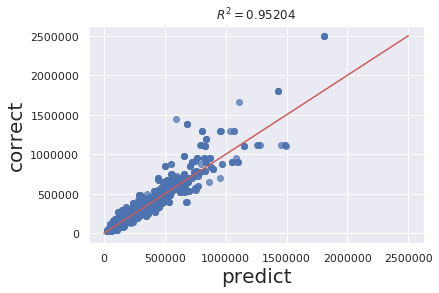

In [101]:
#validationのずれを確認する
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('RMSE : ',np.sqrt(mean_squared_error(oof['oof'], oof['y_train'])))
print('R^2 : ',r2_score(oof['oof'], oof['y_train']))
plt.figure()
plt.scatter(oof['oof'], oof['y_train'], alpha=0.7)
plt.title("$R^2 = {:<.5}$".format(r2_score(oof['oof'], oof['y_train'])))
x = np.linspace(0, 2500000, 100)
plt.plot(x, x, c="indianred")
plt.xlabel('predict',size=20)
plt.ylabel('correct',size=20)

In [102]:
## データ拡張した時
oof['oof'] = oof.id.map(oof.groupby('id').oof.mean())
oof = oof.drop_duplicates(subset='id')
#oof.head()

In [103]:
predictions['mean'] = predictions[['pred0','pred1','pred2','pred3','pred4','pred5','pred6','pred7','pred8','pred9']].mean(axis=1)
predictions['median'] = predictions[['pred0','pred1','pred2','pred3','pred4','pred5','pred6','pred7','pred8','pred9']].median(axis=1)
predictions.head()

,id,pred0,pred1,pred2,pred3,pred4,pred5,pred6,pred7,pred8,pred9,mean,median
0,31470,116009.613010,117487.319227,107352.867249,116183.022808,118775.845217,109205.487920,115526.491504,110911.935670,115072.295091,121152.169520,114767.704722,115768.052257
1,31470,116024.945510,117589.538206,107235.661688,116214.185691,118435.878984,109258.570762,114639.895578,110917.585338,115239.951772,121813.468672,114736.968220,115632.448641
2,31470,116590.315997,118196.097211,107383.312962,116319.635941,118958.886008,109914.387784,115243.176835,112132.339752,114935.526570,121136.455245,115081.013430,115781.406388
3,31471,116553.749001,118772.215015,116296.745530,118369.651422,118577.497694,117947.510726,117935.003663,118357.183007,117947.988684,117903.799151,117866.134389,117947.749705
4,31471,116481.349603,117715.260536,116649.548455,118159.016133,118364.056327,117959.102239,117895.098164,118373.975894,117569.195086,117805.468662,117697.207110,117850.283413


In [104]:
## idごとの平均
predictions['mean'] = predictions.id.map(predictions.groupby('id')['mean'].mean())
predictions = predictions.drop_duplicates(subset='id').reset_index()
predictions.head()

,index,id,pred0,pred1,pred2,pred3,pred4,pred5,pred6,pred7,pred8,pred9,mean,median
0,0,31470,116009.613010,117487.319227,107352.867249,116183.022808,118775.845217,109205.487920,115526.491504,110911.935670,115072.295091,121152.169520,114861.895457,115768.052257
1,3,31471,116553.749001,118772.215015,116296.745530,118369.651422,118577.497694,117947.510726,117935.003663,118357.183007,117947.988684,117903.799151,117781.670750,117947.749705
2,5,31472,75798.799551,76211.732946,76652.777229,75426.240298,76083.206295,77276.165615,75854.411048,76333.703761,76033.423713,76289.461134,76262.571575,76147.469620
3,8,31473,60230.654875,60647.943618,58622.402049,60534.751460,58185.063006,59926.329624,60057.176147,57853.976029,57474.180016,59644.167768,59362.281164,59785.248696
4,11,31474,103313.474808,96524.850476,100352.810841,115408.416789,104652.031269,94930.805291,98927.855404,98740.686975,101131.302387,104397.249720,101581.748615,100742.056614


In [105]:
submit = pd.read_csv('./submit/sample_submit.csv',header=None)
submit = submit.rename(columns={0:'id',1:'target'})
submit['target'] = predictions['mean']
# 提出
submit.to_csv('./submit/submit29.csv', index=None, header=None)
submit.head()

,id,target
0,31471,114861.895457
1,31472,117781.670750
2,31473,76262.571575
3,31474,59362.281164
4,31475,101581.748615


In [106]:
submit['target'].describe().reset_index()

,index,target
0,count,3.126200e+04
1,mean,1.177197e+05
2,std,7.023642e+04
3,min,2.705545e+04
4,25%,7.636457e+04
5,50%,1.014528e+05
6,75%,1.361629e+05
7,max,1.800995e+06


In [15]:

class RegressionPredictor(object):
    '''
    回帰をKfoldで学習するクラス。
    X->dataframe,y->numpy.array
    TODO:分類、多クラス対応/Folderを外部から渡す/predictのプロット/できれば学習曲線のプロット
    '''

    def __init__(self, train_X, train_y, test_X, params=None, Folder=None, sk_model=None, n_splits=5, clf_type='xgb', aggfunc_dict=None):
        self.kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
        self.columns = train_X.columns.values
        self.train_X = train_X
        self.train_y = train_y
        self.test_X = test_X
        self.params = params
        self.aggfunc_dict = aggfunc_dict
        TE_cols = np.sum([len(x) for x in self.aggfunc_dict.values()]) if aggfunc_dict!=None else 0
        self.oof = np.zeros((len(self.train_X),))
        self.preds = np.zeros((len(self.test_X),))
        if clf_type == 'xgb':
            self.FIs = {}
        else:
            self.FIs = np.zeros(self.train_X.shape[1] + TE_cols, dtype=np.float)
        self.sk_model = sk_model
        self.clf_type = clf_type
        self.aggfunc_dict = aggfunc_dict

    @staticmethod
    def merge_dict_add_values(d1, d2):
        return dict(Counter(d1) + Counter(d2))

    def rmse(self):
        return int(np.sqrt(mean_squared_error(self.oof, self.train_y)))

    def get_model(self):
        return self.model

    def target_encoding(self, tr_X, val_X, tr_y):
        '''CVとTEのfoldを同じにした。
        test,valのTEはtr_Xの情報のみで作られる。
        self.testが更新されるが、毎回のCVで上書きされる
        TODO:後からTEを取り出せるようにする。
        '''
        tr_X['target'] = tr_y
        for category_col, func_list in self.aggfunc_dict.items():
            agg_func = {'target': func_list}
            #agg_funcでgruopby
            agg_df = tr_X.groupby(category_col)['target'].agg(agg_func)
            #列名作成
            agg_df.columns = [category_col + '_' + '_'.join(col).strip() for col in agg_df.columns.values]

            #元の列に集約結果をmapしその値をコピーし新規列に加え返す。
            #列名を追加する。
            if not set(agg_df.columns.values).issubset(set(self.columns)):
                self.columns = np.append(self.columns, agg_df.columns.values)
            for col in agg_df.columns.values:
                tr_X[col] = tr_X[category_col].map(agg_df[col]).copy()
                val_X[col] = val_X[category_col].map(agg_df[col]).copy()
                self.test_X[col] = self.test_X[category_col].map(agg_df[col]).copy()
        tr_X.drop(columns='target', inplace=True)
        return tr_X, val_X

    def _get_xgb_callbacks(self):
        '''nround,early_stopをparam_dictから得るためのメソッド'''
        nround = 1000
        early_stop_rounds = 10
        if self.params['num_boost_round']:
            nround = self.params['num_boost_round']
            del self.params['num_boost_round']

        if self.params['early_stopping_rounds']:
            early_stop_rounds = self.params['early_stopping_rounds']
            del self.params['early_stopping_rounds']
        return nround, early_stop_rounds

    def _get_cv_model(self, tr_X, val_X, tr_y, val_y, val_idx):

        if self.clf_type == 'cat':
            clf_train = Pool(tr_X, tr_y)
            clf_val = Pool(val_X, val_y)
            clf_test = Pool(self.test_X)
            self.model = CatBoost(params=self.params)
            self.model.fit(clf_train, eval_set=[clf_val])
            self.oof[val_idx] = self.model.predict(clf_val)
            self.preds += self.model.predict(clf_test) / self.kf.n_splits
            self.FIs += self.model.get_feature_importance()

        elif self.clf_type == 'lgb':
            clf_train = lgb.Dataset(tr_X, tr_y)
            clf_val = lgb.Dataset(val_X, val_y, reference=lgb.train)
            self.model = lgb.train(self.params, clf_train,valid_sets=[clf_train,clf_val],verbose_eval=500)
            self.oof[val_idx] = self.model.predict(val_X, num_iteration=self.model.best_iteration)
            self.preds += self.model.predict(self.test_X, num_iteration=self.model.best_iteration) / self.kf.n_splits
            self.FIs += self.model.feature_importance(importance_type='gain')

        elif self.clf_type == 'xgb':
            clf_train = xgb.DMatrix(tr_X, label=tr_y, feature_names=self.columns)
            clf_val = xgb.DMatrix(val_X, label=val_y, feature_names=self.columns)
            clf_test = xgb.DMatrix(self.test_X, feature_names=self.columns)
            evals = [(clf_train, 'train'), (clf_val, 'eval')]
            evals_result = {}

            nround, early_stop_rounds = self._get_xgb_callbacks()
            self.model = xgb.train(self.params,
                                   clf_train,
                                   num_boost_round=nround,
                                   early_stopping_rounds=early_stop_rounds,
                                   evals=evals,
                                   evals_result=evals_result)

            self.oof[val_idx] = self.model.predict(clf_val)
            self.preds += self.model.predict(clf_test) / self.kf.n_splits
            self.FIs = self.merge_dict_add_values(self.FIs, self.model.get_fscore())

        elif self.clf_type == 'sklearn':
            self.model = self.sk_model
            self.model.fit(tr_X, tr_y)
            self.oof[val_idx] = self.model.predict(val_X)
            self.preds += self.model.predict(self.test_X) / self.kf.n_splits
            self.FIs += self.model.feature_importances_
        else:
            raise ValueError('clf_type is wrong.')

    def fit(self):
        for i,(train_idx, val_idx) in enumerate(self.kf.split(self.train_X,self.train_y)):
            start_time = time()
            
            print(f'Training on fold {i+1}')
            X_train = self.train_X.iloc[train_idx, :]
            X_val = self.train_X.iloc[val_idx, :]
            y_train = self.train_y[train_idx]
            y_val = self.train_y[val_idx]
            if self.aggfunc_dict != None:
                X_train, X_val = self.target_encoding(X_train, X_val, y_train)
            self._get_cv_model(X_train, X_val, y_train, y_val, val_idx)
            
        print('-' * 30)
        print('Training has finished.')
        print('Total training time is {}'.format(str(datetime.timedelta(seconds=time() - start_time))))
        print('-' * 30)
        print('this self.model`s rmse:', self.rmse())

        return self.oof, self.preds, self.FIs

    def plot_FI(self, max_row=50):
        plt.figure(figsize=(10, 20))
        if self.clf_type == 'xgb':
            df = pd.DataFrame.from_dict(self.FIs, orient='index').reset_index()
            df.columns = ['col', 'FI']
        else:
            df = pd.DataFrame({'FI': self.FIs, 'col': self.columns})
        df = df.sort_values('FI', ascending=False).reset_index(drop=True).iloc[:max_row, :]
        sns.barplot(x='FI', y='col', data=df)
        plt.show()

    def plot_pred_dist(self):
        fig, axs = plt.subplots(1, 2, figsize=(18, 5))
        sns.distplot(self.oof, ax=axs[1], label='oof')
        sns.distplot(self.train_y, ax=axs[0], label='train_y')
        sns.distplot(self.preds, ax=axs[0], label='test_preds')
        plt.show()


In [ ]:
lgbPredictor = RegressionPredictor(X_train, y_train_log, X_test, params=lgbm_params,
                                   sk_model=None, n_splits=10, clf_type='lgb')
lgboof, lgbpreds, lgbFIs = lgbPredictor.fit()

Training on fold 1
Training until validation scores don't improve for 50 rounds.
[500]	training's l1: 0.0479336	valid_1's l1: 0.0528111
[1000]	training's l1: 0.0365051	valid_1's l1: 0.0429451
[1500]	training's l1: 0.0292307	valid_1's l1: 0.0364804
[2000]	training's l1: 0.0241319	valid_1's l1: 0.0320857
[2500]	training's l1: 0.0203325	valid_1's l1: 0.02871
[3000]	training's l1: 0.0174064	valid_1's l1: 0.0258556
[3500]	training's l1: 0.0151102	valid_1's l1: 0.023609
[4000]	training's l1: 0.0132772	valid_1's l1: 0.0217733
[4500]	training's l1: 0.0117064	valid_1's l1: 0.0201494
[5000]	training's l1: 0.0104201	valid_1's l1: 0.0188026
[5500]	training's l1: 0.00937219	valid_1's l1: 0.0176634
[6000]	training's l1: 0.00850812	valid_1's l1: 0.0167204
[6500]	training's l1: 0.00774427	valid_1's l1: 0.0158603
[7000]	training's l1: 0.00707338	valid_1's l1: 0.0151004
[7500]	training's l1: 0.00651159	valid_1's l1: 0.0144637
[8000]	training's l1: 0.00602263	valid_1's l1: 0.0139013
[8500]	training's l1:

In [15]:
train = pd.read_csv('./input/train.csv')
oof = pd.DataFrame()

In [18]:
X_train['oof']=lgboof
X_train['y_train']=y_train

In [19]:
oof['oof']=X_train.reset_index().groupby('index')['oof'].mean()
# oof['oof']=np.expm1(X_train.reset_index().groupby('index')['oof'].mean())

oof['y_train']=X_train.reset_index().groupby('index')['y_train'].mean()

RMSE :  6130.602992086622
R^2 :  0.9929131905011823


Text(0, 0.5, 'correct')

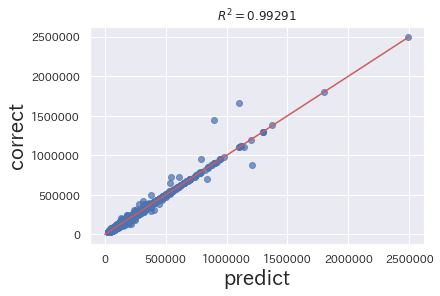

In [20]:
#validationのずれを確認する
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('RMSE : ',np.sqrt(mean_squared_error(oof['oof'], oof['y_train'])))
print('R^2 : ',r2_score(oof['oof'], oof['y_train']))
plt.figure()
plt.scatter(oof['oof'], oof['y_train'], alpha=0.7)
plt.title("$R^2 = {:<.5}$".format(r2_score(oof['oof'], oof['y_train'])))
x = np.linspace(0, 2500000, 100)
plt.plot(x, x, c="indianred")
plt.xlabel('predict',size=20)
plt.ylabel('correct',size=20)

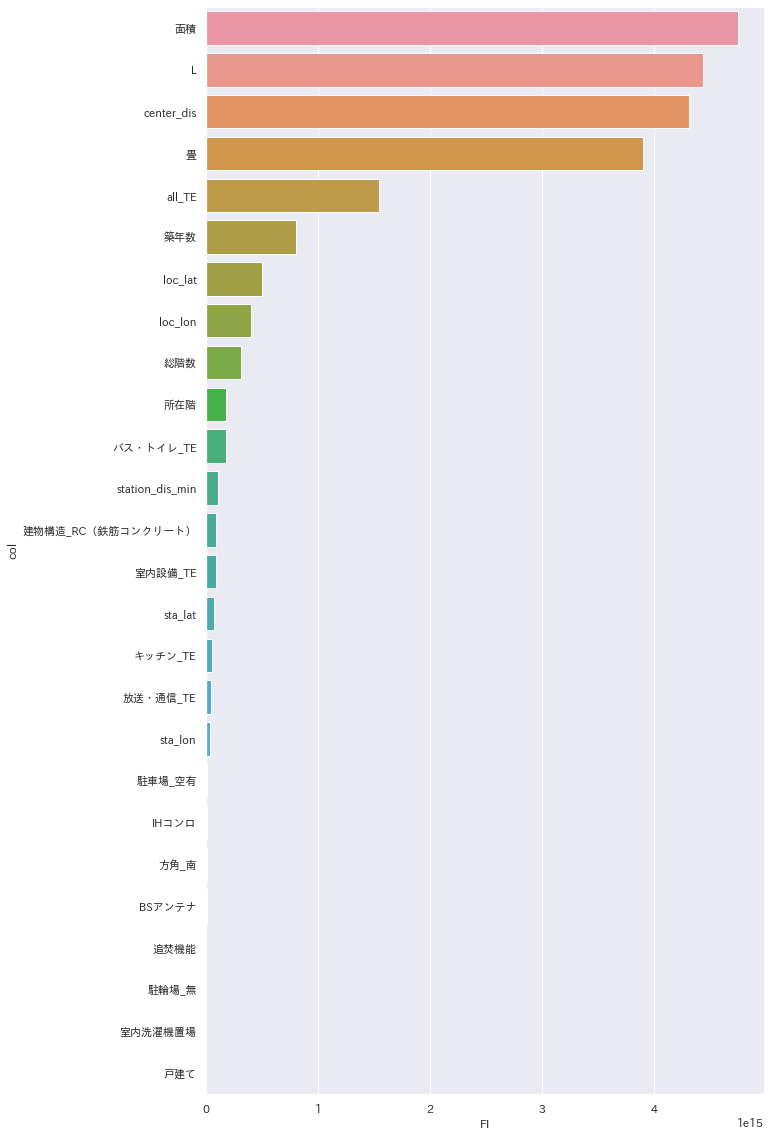

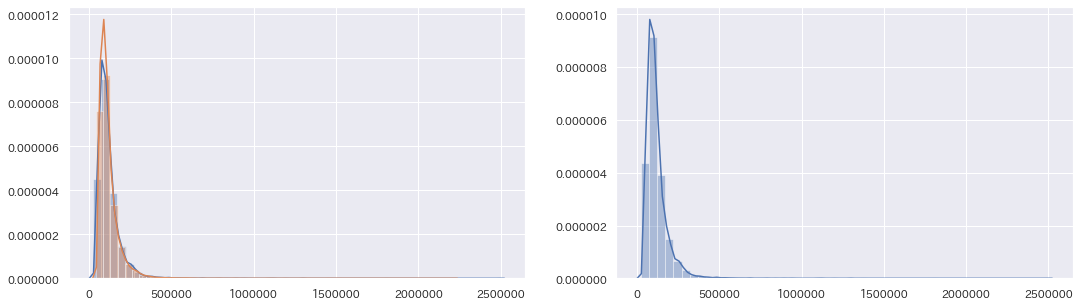

In [23]:
lgbPredictor.plot_FI(50)
lgbPredictor.plot_pred_dist()

In [26]:
X_test['pred']=lgbpreds

In [27]:
submit = pd.read_csv('./submit/sample_submit.csv',header=None)
submit = submit.rename(columns={0:'id',1:'target'})
submit['target'] =X_test.reset_index().groupby('index')['pred'].mean().values
submit.to_csv('./submit/submit27.csv', index=None, header=None)
submit.head()

,id,target
0,31471,121950.789011
1,31472,110534.283341
2,31473,81097.167583
3,31474,72543.536652
4,31475,119825.797079


In [28]:
submit['target'].describe().reset_index()

,index,target
0,count,3.126200e+04
1,mean,1.189313e+05
2,std,6.778492e+04
3,min,4.424822e+04
4,25%,8.023254e+04
5,50%,1.016907e+05
6,75%,1.337258e+05
7,max,2.215709e+06


In [29]:
submit.sort_values('target')

,id,target
11597,43068,4.424822e+04
9432,40903,4.501270e+04
10840,42311,4.501315e+04
11545,43016,4.511834e+04
8694,40165,4.526596e+04
...,...,...
559,32030,1.447302e+06
2184,33655,1.465888e+06
9101,40572,1.516088e+06
2823,34294,1.577736e+06


In [194]:
X_test.sort_values('pred').tail(30)

,面積,築年数,station_dis_min,center_dis,loc_lat,loc_lon,総階数,畳,所在階,sta_lat,sta_lon,追焚機能,方角_南,BSアンテナ,L,建物構造_RC（鉄筋コンクリート）,戸建て,室内洗濯機置場,IHコンロ,駐輪場_無,駐車場_空有,pred
43664,172.64,3,458.732821,3841.201794,35.664376,139.705039,3.0,119,NaN,35.665251,139.712092,1,0,0,1,0,1,1,0,0,1,1.081076e+06
58861,188.69,352,309.905150,1811.914322,35.659778,139.747959,6.0,130,5.0,35.654985,139.744002,1,0,1,1,1,0,1,1,0,1,1.089020e+06
43664,172.64,3,458.732821,3841.201794,35.664376,139.705039,3.0,119,NaN,35.658034,139.701636,1,0,0,1,0,1,1,0,0,1,1.147189e+06
39418,172.64,3,458.732821,3841.201794,35.664376,139.705039,3.0,119,NaN,35.658034,139.701636,1,0,0,1,0,1,1,0,0,1,1.147189e+06
53116,154.50,177,502.650087,3460.495464,35.648772,139.726246,8.0,106,2.0,35.656134,139.736881,0,1,0,1,1,0,1,0,0,1,1.162768e+06
53116,154.50,177,502.650087,3460.495464,35.648772,139.726246,8.0,106,2.0,35.651851,139.722174,0,1,0,1,1,0,1,0,0,1,1.164186e+06
53116,154.50,177,502.650087,3460.495464,35.648772,139.726246,8.0,106,2.0,35.646714,139.710078,0,1,0,1,1,0,1,0,0,1,1.171136e+06
34740,221.30,271,437.148808,4096.221000,35.649227,139.713796,13.0,152,11.0,35.648092,139.703148,1,1,1,1,1,0,0,0,0,0,1.250236e+06
34740,221.30,271,437.148808,4096.221000,35.649227,139.713796,13.0,152,11.0,35.651851,139.722174,1,1,1,1,1,0,0,0,0,0,1.250577e+06
34740,221.30,271,437.148808,4096.221000,35.649227,139.713796,13.0,152,11.0,35.646714,139.710078,1,1,1,1,1,0,0,0,0,0,1.251121e+06


In [187]:
raw_test=pd.read_csv('./input/test.csv')

In [188]:
raw_train=pd.read_csv('./input/train.csv')

In [195]:
raw_test[raw_test['id']==40572]

,id,所在地,アクセス,間取り,築年数,方角,面積,所在階,バス・トイレ,キッチン,放送・通信,室内設備,駐車場,周辺環境,建物構造,契約期間
9101,40572,東京都千代田区二番町,有楽町線\t麹町駅\t徒歩1分\t\t総武線・中央線（各停）\t四ツ谷駅\t徒歩7分\t\t...,3LDK,10年1ヶ月,西,219.79m2,13階／13階建,バス・トイレ別／\tシャワー／\t追焚機能／\t浴室乾燥機\t／\t温水洗浄便座／\t洗面台独立,ガスコンロ／\tコンロ3口／\tシステムキッチン\t／\t給湯／\t冷蔵庫あり,インターネット対応／\t光ファイバー／\tCATV／\tBSアンテナ／\tインターネット使用料無料,冷房／\tエアコン付／\t床暖房\tトランクルーム\t／\tウォークインクローゼット\tバル...,駐輪場\t空有\tバイク置き場\t空有,【小学校】 451m\t【スーパー】 237m\t【スーパー】 450m\t【コンビニ】 1...,鉄骨造,2年間
